# Problem Transformation - FastText

This notebook discusses Multi-label classificaon methods for the [academia.stackexchange.com](https://academia.stackexchange.com/) data dump in [FastText](https://radimrehurek.com/gensim_3.8.3/models/fasttext.html#module-gensim.models.fasttext) representation.

## Table of Contents
* [Data import](#data_import)
* [Data preparation](#data_preparation)
* [Methods](#methods)
* [Evaluation](#evaluation)

In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from joblib import dump, load
from pathlib import Path
from academia_tag_recommender.definitions import MODELS_PATH
from academia_tag_recommender.classifier import Classifier, available_classifier_paths

DATA_FOLDER = Path(MODELS_PATH) / 'classifier' / 'multi-label'
RANDOM_STATE = 0

<a id='data_import'/>

## Data import

In [3]:
from academia_tag_recommender.data import documents
from academia_tag_recommender.test_train_data import get_y, get_test_train_data

def get_X():
    return np.vstack([document.text for document in documents])

X_train, X_test, y_train, y_test = get_test_train_data(get_X(), get_y(), scale=False)
print('Train set with shape ', X_train.shape)
print('Test set with shape', X_test.shape)

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Train set with shape  (24812, 1)
Test set with shape (8270, 1)


<a id='data_preparation'/>

## Data Preparation

In [4]:
from academia_tag_recommender.embedded_data import word2vec, doc2vec, fasttext2vec

In [5]:
X_train, X_test = fasttext2vec(X_train, X_test)

[['kind', 'visa', 'required', 'work', 'academia', 'japan']]
[['kind', 'visa', 'required', 'work', 'academia', 'japan', 'title', 'kind', 'visa', 'class', 'apply', 'order', 'work', 'academic', 'japan']]
[['computational', 'chemist', 'online', 'resources', 'available', 'ph', 'level', 'jobs', 'online', 'resources', 'available', 'job', 'search', 'ph', 'level', 'computational', 'chemistry', 'field']]


In [6]:
from academia_tag_recommender.preprocessing_definition import PreprocessingDefinition
preprocessing = PreprocessingDefinition('fasttext', 'basic', 'basic', 'english', '1,1', 'None')

def create_classifier(classifier, name=False):
    clf = Classifier(classifier, preprocessing, name)
    clf.fit(X_train, y_train)
    clf.score(X_test, y_test)
    path = clf.save('fasttext')
    print('Training: {}s'.format(clf.training_time))
    print('Test: {}s'.format(clf.test_time))
    clf.evaluation.print_stats()

<a id='methods'/>

## Methods

* [Problem Transformation](#problem_transformation)
* [Algorithm Adaption](#algorithm_adaption)
* [Ensembles](#ensembles)

<a id='problem_transformation'/>

### Problem Transformation

- [DecisionTreeClassifier](#decisiontree)
- [ExtraTreeClassifier](#extratree)
- [KNeighborsClassifier](#kNN)
- [RadiusNeighborsClassifier](#rNN)
- [MLPClassifier](#mlp)
- [RidgeClassifierCV](#ridge)
- [MultioutputClassifier](#multioutput)
- [Classwise Classifier](#classwise)
- [Classifier Chain](#chain)
- [Label Powerset](#label_powerset)

<a id='decisiontree'/>

**DecisionTreeClassifier** [source](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [6]:
from sklearn.tree import DecisionTreeClassifier

create_classifier(DecisionTreeClassifier(random_state=RANDOM_STATE), 'DecisionTreeClassifier')

Training: 71.52907967567444s
Test: 0.055212974548339844s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.022394195888754534     0.006892382103990327     0.18171503426037888      0.17916767432486902      0.16437765110074665      
micro                                                            0.17140221402214023      0.17745940783190067      0.17437822618488974      
macro                                                            0.07681859999910591      0.07774979559054156      0.07693497376830724      


<a id='extratree'/>

**ExtraTreeClassifier** [source](https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html#sklearn.tree.ExtraTreeClassifier)

In [7]:
from sklearn.tree import ExtraTreeClassifier

create_classifier(ExtraTreeClassifier(random_state=RANDOM_STATE), 'ExtraTreeClassifier')

Training: 1.9100041389465332s
Test: 0.054862022399902344s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.022960605867752816     0.006045949214026602     0.1610016122531237       0.15737404272470776      0.14501026851691906      
micro                                                            0.1506185376661743       0.1558261700095511       0.15317810534222137      
macro                                                            0.06706809610631718      0.06901358534429874      0.06776117884054655      


<a id='kNN'/>

**KNeighborsClassifier** [source](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

create_classifier(KNeighborsClassifier(), 'KNeighborsClassifier')

Training: 0.9885983467102051s
Test: 90.21401453018188s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.01311143639025011      0.06299879081015719      0.36445384925433294      0.21472188633615477      0.25225024471699203      
micro                                                            0.5207769854929923       0.2022922636103152       0.2913943729792942       
macro                                                            0.36200178744885564      0.08805822514829655      0.12594900799260716      


<a id='rNN'/>

**RadiusNeighborsClassifier** [source](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html#sklearn.neighbors.RadiusNeighborsClassifier)

In [9]:
from sklearn.neighbors import RadiusNeighborsClassifier

create_classifier(RadiusNeighborsClassifier(outlier_label='most_frequent'), 'RadiusNeighborsClassifier')

Training: 1.2686257362365723s
Test: 491.5098919868469s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013325908483421372     0.04050785973397823      0.00012091898428053205   6.0459492140266024e-05   8.061265618702135e-05    
micro                                                            1.0                      4.775549188156638e-05    9.550642280693377e-05    
macro                                                            0.005263157894736842     8.771929824561403e-05    0.0001725625539257981    


<a id='mlp'/>

**MLPClassifier** [source](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

In [10]:
from sklearn.neural_network import MLPClassifier

create_classifier(MLPClassifier(random_state=RANDOM_STATE), 'MLPClassifier')

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training: 181.84474420547485s
Test: 0.14660143852233887s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.01147712085534271      0.08778718258766627      0.48834340991535674      0.2880128980249899       0.3388376422717414       
micro                                                            0.6714252005663048       0.27177650429799427      0.3869322817514278       
macro                                                            0.5170424671554481       0.17644166170506725      0.23791637951051633      


<a id='ridge'/>

**RidgeClassifierCV** [source](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifierCV.html#sklearn.linear_model.RidgeClassifierCV)

*TODO: implementation needs to be adjusted for different prediction format: `[125 278 302 ...  80  64 158]`*

In [11]:
from sklearn.linear_model import RidgeClassifierCV

#create_classifier(RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]))

<a id='multioutput'/>

**MultioutputClassifier** [source](https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html#sklearn.multioutput.MultiOutputClassifier)

MultiouputClassifier transforms sklearn classifier into classifiers capable of Binary Relevence.

In [12]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC

create_classifier(MultiOutputClassifier(LinearSVC(random_state=RANDOM_STATE)), 'MultioutputClassifier(LinearSVC)')

Training: 36.86436986923218s
Test: 0.708122730255127s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.011894609558963916     0.07629987908101572      0.35623740427247075      0.1935006045949214       0.23481631830483102      
micro                                                            0.7159309021113244       0.1781279847182426       0.28527724665391974      
macro                                                            0.3267414739786703       0.07841967933165879      0.11149055914749245      


In [13]:
from sklearn.linear_model import LogisticRegression

create_classifier(MultiOutputClassifier(LogisticRegression(random_state=RANDOM_STATE)), 'MultioutputClassifier(LogisticRegression)')

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training: 31.176360607147217s
Test: 0.7101013660430908s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012199452682492205     0.0690447400241838       0.3078597339782346       0.16570939137444576      0.20198048022110895      
micro                                                            0.6907993966817496       0.1531041069723018       0.250654782846644        
macro                                                            0.2483076784783983       0.046646316170998924     0.06989519623690374      


<a id='classwise'/>

**Classwise Classifier**

In [14]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score

scorer = make_scorer(accuracy_score)

In [15]:
from academia_tag_recommender.classwise_classifier import ClasswiseClassifier, ClassifierOption

classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE), grid_search=True, parameter={'C':[0.1, 0.5, 1, 5, 10]}),
                      ClassifierOption(LogisticRegressionCV(Cs=[0.1, 0.5, 1, 5, 10], random_state=RANDOM_STATE, max_iter=2000, scoring=scorer))]
                      #ClassifierOption(RandomForestClassifier(random_state=RANDOM_STATE))]

#create_classifier(ClasswiseClassifier(classifier_options), 'ClasswiseClassifier')

<a id='chain'/>

**Classifier Chain** [source](http://scikit.ml/api/skmultilearn.problem_transform.cc.html#skmultilearn.problem_transform.ClassifierChain)

<cite>[Read et al., 2011][1]</cite>

[1]: https://doi.org/10.1007/s10994-011-5256-5

In [16]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.svm import LinearSVC

create_classifier(ClassifierChain(classifier=LinearSVC(random_state=RANDOM_STATE)), 'ClassifierChain(LinearSVC)')

Training: 59.462576150894165s
Test: 2.3373069763183594s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.011746324699293579     0.08198307134220073      0.4121825876662636       0.22691455058444174      0.2740162376921748       
micro                                                            0.6968447756461075       0.20988538681948424      0.32260432341175177      
macro                                                            0.36510527601996234      0.09588386364226349      0.13333327790711894      


In [17]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
create_classifier(ClassifierChain(classifier=LogisticRegression(random_state=RANDOM_STATE)), 'ClassifierChain(LogisticRegression)')

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Training: 61.95880484580994s
Test: 2.3796801567077637s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012154267167313689     0.07194679564691657      0.34575977428456267      0.18833937928254738      0.22831653902996107      
micro                                                            0.6683729433272395       0.1745940783190067       0.27686482393032946      
macro                                                            0.26355760203141765      0.05203465331776003      0.07634375897775614      


<a id='label_powerset'/>

**Label Powerset** [source](http://scikit.ml/api/skmultilearn.problem_transform.lp.html#skmultilearn.problem_transform.LabelPowerset)

In [18]:
from skmultilearn.problem_transform import LabelPowerset

create_classifier(LabelPowerset(classifier=LinearSVC(random_state=RANDOM_STATE)), 'LabelPowerset(LinearSVC)')

Training: 1241.9160976409912s
Test: 1.5229370594024658s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013052249729523324     0.05900846432889964      0.5410600564288593       0.27433696090286175      0.3432833342930078       
micro                                                            0.5211585665193913       0.2534861509073543       0.3410763052208835       
macro                                                            0.3260258565107868       0.13025724121590113      0.16327180929888385      


In [19]:
# Does not finish
#create_classifier(LabelPowerset(classifier=LogisticRegression(random_state=RANDOM_STATE)), 'LabelPowerset(LogisticRegression)')

<a id='Algorithm Adaption'/>

### Algorithm Adaption

- [MLkNN](#mlknn)
- [BRkNNa](#brknna)
- [BRkNNb](#brknnb)
- [MLTSVM](#mltsvm)
- [MLARAM](#mlaram)

<a id='mlknn'/>

**MLkNN** [source](http://scikit.ml/api/skmultilearn.adapt.mlknn.html#multilabel-k-nearest-neighbours)

> Firstly, for each test instance, its k nearest neighbors in the training set are identified. Then, according to statistical information gained from the label sets of these neighboring instances, i.e. the number of neighboring instances belonging to each possible class, maximum a posteriori (MAP) principle is utilized to determine the label set for the test instance.
<cite>[Zhang & Zhou, 2007][1]</cite>

[1]: https://doi.org/10.1016/j.patcog.2006.12.019

In [20]:
from skmultilearn.adapt import MLkNN

create_classifier(MLkNN(), 'MLkNN')

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training: 287.4469313621521s
Test: 77.6119818687439s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012730859797619806     0.06831922611850061      0.36907698508665865      0.21221483272873842      0.25176292201685185      
micro                                                            0.5639693821760525       0.1970391595033429       0.292044167610419        
macro                                                            0.354065074582009        0.11034666344815723      0.15294883350534125      


<a id='brknna'/>

**BRkNNa** [source](http://scikit.ml/api/skmultilearn.adapt.brknn.html#skmultilearn.adapt.brknn.BRkNNaClassifier)

> BRkNN is an adaptation of the kNN algorithm for multilabel classification that is conceptually equivalent to using the popular Binary Relevance problem transformation method in conjunction with the kNN algorithm, but |L| times faster. [L = labels]
<cite>[Spyromitros et al., 2008][2]</cite>

[2]: https://doi.org/10.1007/978-3-540-87881-0_40


>  This version of the classifier assigns the labels that are assigned to at least half of the neighbors.
<cite>[skmultilearn][3]</cite>

[3]: http://scikit.ml/api/skmultilearn.adapt.brknn.html#skmultilearn.adapt.BRkNNaClassifier

In [21]:
from skmultilearn.adapt import BRkNNaClassifier

create_classifier(BRkNNaClassifier(), 'BRkNNaClassifier')

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training: 0.7460715770721436s
Test: 52.30018925666809s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.01258130210653599      0.06481257557436518      0.3013905683192261       0.151819830713422        0.19048799447227502      
micro                                                            0.6247602812699765       0.14001910219675262      0.2287676042601334       
macro                                                            0.3076348566985569       0.05075396208995591      0.07649268248485007      


<a id='brknnb'/>

**BRkNNb** [source](http://scikit.ml/api/skmultilearn.adapt.brknn.html#skmultilearn.adapt.brknn.BRkNNbClassifier)

>  This version of the classifier assigns the most popular m labels of the neighbors, where m is the average number of labels assigned to the object’s neighbors.
<cite>[skmultilearn][4]</cite>

[4]: http://scikit.ml/api/skmultilearn.adapt.brknn.html#skmultilearn.adapt.BRkNNbClassifier

In [22]:
from skmultilearn.adapt import BRkNNbClassifier

create_classifier(BRkNNbClassifier(), 'BRkNNbClassifier')

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training: 0.7799336910247803s
Test: 55.5194993019104s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.027003754852669763     0.002176541717049577     0.019568722289399435     0.017206771463119712     0.01781309379858352      
micro                                                            0.016904194578069506     0.017956064947468958     0.01741426024129866      
macro                                                            0.00025525667454707617   0.014142300194931774     0.0004979635502990487    


<a id='mltsvm'/>

**MLTSVM** [source](http://scikit.ml/api/skmultilearn.adapt.mltsvm.html#skmultilearn.adapt.MLTSVM)

<cite>[Chen et al., 2016][5]</cite>

> Twin multi-Label Support Vector Machines
<cite>[skmultilearn][6]</cite>

[5]: https://doi.org/10.1016/j.patcog.2015.10.008
[6]: http://scikit.ml/api/skmultilearn.adapt.mltsvm.html#skmultilearn.adapt.MLTSVM

In [23]:
from skmultilearn.adapt import MLTSVM

# TODO(FIX): executes with error
#create_classifier(MLTSVM(c_k = 2**-1), 'MLTSVM()')

<a id='mlaram'/>

**MLARAM** [source](http://scikit.ml/api/skmultilearn.adapt.mlaram.html#skmultilearn.adapt.MLARAM)

> an extension of fuzzy Adaptive Resonance Associative Map (ARAM) – an Adaptive Resonance Theory (ART)based neural network. It aims at speeding up the classification process in the presence of very large data.
<cite>[F. Benites & E. Sapozhnikova, 2015][7]</cite>

[7]: https://doi.org/10.1109/ICDMW.2015.14

In [24]:
from skmultilearn.adapt import MLARAM

create_classifier(MLARAM(), 'MLARAM')

Training: 37.73678541183472s
Test: 233.6073920726776s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.01670591230191561      0.042805320435308346     0.4351372906617767       0.31085247883917777      0.3243832594190053       
micro                                                            0.3493018503802929       0.2938872970391595       0.3192074277711499       
macro                                                            0.2149677732303754       0.1346804714128431       0.14642427053022875      


<a id='ensembles'/>

### Ensembles

- [ExtraTreesClassifier](#extra_trees)
- [RandomForestClassifier](#random_forest)
- [RAkELo](#rakelo)
- [RAkELd](#rakeld)
- [MajorityVotingClassifier](#majority_voting)
- [LabelSpacePartitioningClassifier](#label_space)

<a id='extra_trees'/>

**ExtraTreesClassifier** [source](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

#create_classifier(ExtraTreesClassifier(random_state=RANDOM_STATE))

<a id='random_forest'/>

**RandomForestClassifier** [source](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#create_classifier(RandomForestClassifier(random_state=RANDOM_STATE))

<a id='rakelo'/>

**RAkELo** [source](http://scikit.ml/api/skmultilearn.ensemble.rakelo.html#skmultilearn.ensemble.RakelO)

> Rakel: randomly breaking the initial set of labels into a number of small-sized labelsets, and employing [Label powerset] to train a corresponding multilabel classifier.
<cite>[Tsoumakas et al., 2011][1]</cite>


> Divides the label space in to m subsets of size k, trains a Label Powerset classifier for each subset and assign a label to an instance if more than half of all classifiers (majority) from clusters that contain the label assigned the label to the instance.
<cite>[skmultilearn][2]</cite>


[1]: https://doi.org/10.1109/TKDE.2010.164
[2]: http://scikit.ml/api/skmultilearn.ensemble.rakelo.html#skmultilearn.ensemble.RakelO

In [6]:
from skmultilearn.ensemble import RakelO
from sklearn.svm import LinearSVC

create_classifier(RakelO(
    base_classifier=LinearSVC(random_state=RANDOM_STATE),
    model_count=y_train.shape[1]
))

Training: 214.4679651260376s
Test: 118.7092227935791s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012065805384076879     0.07134220072551391      0.3207275292220879       0.16614873035066505      0.20599959693671907      
micro                                                            0.7210762331838565       0.15364769958434857      0.25331810484029776      
macro                                                            0.22013718396778778      0.04925591482223556      0.07044296235337173      


In [7]:
from sklearn.linear_model import LogisticRegression

create_classifier(RakelO(
    base_classifier=LogisticRegression(random_state=RANDOM_STATE),
    model_count=y_train.shape[1]
))

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Training: 315.007435798645s
Test: 126.89245176315308s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012025711194552282     0.07146311970979444      0.3451733172108021       0.18820838371624346      0.22804831001324352      
micro                                                            0.6901513735750328       0.176436863981654        0.2810288410318849       
macro                                                            0.3408073440413237       0.06239387141183692      0.09191193974649585      


<a id='rakeld'/>

**RAkELd** [source](http://scikit.ml/api/skmultilearn.ensemble.rakeld.html#skmultilearn.ensemble.RakelD)

>Divides the label space in to equal partitions of size k, trains a Label Powerset classifier per partition and predicts by summing the result of all trained classifiers.
<cite>[skmultilearn][3]</cite>

[3]: http://scikit.ml/api/skmultilearn.ensemble.rakeld.html#skmultilearn.ensemble.RakelD

In [8]:
from skmultilearn.ensemble import RakelD

create_classifier(RakelD(base_classifier=LinearSVC(random_state=RANDOM_STATE)))

C:\Users\Monique\anaconda3\lib\site-packages\skmultilearn\cluster\random.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(label_sets)


Training: 67.5120050907135s
Test: 36.440678358078s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012053077069942086     0.07001209189842805      0.32488915759774284      0.16861144699717853      0.20894167098520178      
micro                                                            0.7170880557977333       0.15718312550762029      0.25784709432187786      
macro                                                            0.2507729594303562       0.05284608477445113      0.07600037383024534      


In [9]:
create_classifier(RakelD(base_classifier=LogisticRegression(random_state=RANDOM_STATE)))

C:\Users\Monique\anaconda3\lib\site-packages\skmultilearn\cluster\random.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(label_sets)
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfg

Training: 95.44743609428406s
Test: 36.68747067451477s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012035257430153375     0.07158403869407497      0.3479201934703749       0.189993954050786        0.23002792652732193      
micro                                                            0.6853891336270191       0.17839568104725048      0.28310398422987987      
macro                                                            0.31293891472952484      0.06363100701206824      0.09333664193926215      


***Clustering***

In [11]:
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder
from academia_tag_recommender.test_train_data import get_all_labels

graph_builder = LabelCooccurrenceGraphBuilder(weighted=True, include_self_edges=False)

label_names = get_all_labels()

edge_map = graph_builder.transform(y_train)
print("{} labels, {} edges".format(len(label_names), len(edge_map)))

190 labels, 7707 edges


In [12]:
from skmultilearn.cluster import IGraphLabelGraphClusterer
import igraph as ig

# we define a helper function for visualization purposes
def to_membership_vector(partition):
    return {
        member :  partition_id
        for partition_id, members in enumerate(partition)
        for member in members
    }

clusterer_igraph = IGraphLabelGraphClusterer(graph_builder=graph_builder, method='walktrap')
partition = clusterer_igraph.fit_predict(X_train, y_train)
print(partition)

colors = ['red', 'white', 'blue']
membership_vector = to_membership_vector(partition)
visual_style = {
    "vertex_size" : 20,
    "vertex_label": [x[0] for x in label_names],
    "edge_width" : [10*x/y_train.shape[0] for x in clusterer_igraph.graph_.es['weight']],
    "vertex_color": [colors[membership_vector[i]] for i in range(y_train.shape[1])],
    "bbox": (400,400),
    "margin": 80,
    "layout": clusterer_igraph.graph_.layout_circle()

}

#ig.plot(clusterer_igraph.graph_, **visual_style)

[list([0, 1, 3, 6, 7, 11, 14, 17, 19, 24, 25, 26, 27, 30, 31, 32, 36, 41, 44, 46, 50, 51, 58, 59, 63, 70, 75, 76, 77, 80, 88, 89, 90, 91, 95, 96, 97, 98, 99, 104, 110, 111, 112, 113, 114, 115, 116, 117, 120, 123, 124, 125, 132, 133, 134, 137, 139, 140, 141, 142, 143, 145, 150, 152, 154, 156, 158, 166, 172, 175, 183, 184, 187, 188, 189])
 list([2, 4, 5, 8, 9, 10, 12, 13, 15, 16, 18, 20, 21, 22, 23, 28, 29, 33, 34, 35, 37, 38, 39, 40, 42, 43, 45, 47, 48, 49, 52, 53, 54, 55, 56, 57, 60, 61, 62, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 78, 79, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 100, 101, 102, 103, 105, 106, 107, 108, 109, 118, 119, 121, 122, 126, 127, 128, 129, 130, 131, 135, 136, 138, 144, 146, 147, 148, 149, 151, 153, 155, 157, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 173, 174, 176, 177, 178, 179, 180, 181, 182, 185, 186])]


C:\Users\Monique\anaconda3\lib\site-packages\skmultilearn\cluster\igraph.py:190: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(


<a id='majority_vorting'/>

**MajorityVotingClassifier** [source](http://scikit.ml/api/skmultilearn.ensemble.voting.html#skmultilearn.ensemble.MajorityVotingClassifier)

In [13]:
from skmultilearn.ensemble.voting import MajorityVotingClassifier
from skmultilearn.problem_transform import ClassifierChain

create_classifier(MajorityVotingClassifier(
    classifier=ClassifierChain(classifier=LogisticRegression(random_state=RANDOM_STATE)),
    clusterer=clusterer_igraph
), 'MajorityVotingClassifier(ClassifierChain(LogisticRegression))')

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Training: 50.38839387893677s
Test: 5.04201602935791s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012159994908674346     0.07037484885126966      0.32808544941555823      0.17912132204756145      0.2169783689372565       
micro                                                            0.675249807840123        0.1678849553294157       0.26891142146546776      
macro                                                            0.2635050485443275       0.050362988232068306     0.07445904338722138      


In [14]:
create_classifier(MajorityVotingClassifier(
    classifier=ClassifierChain(classifier=LinearSVC(random_state=RANDOM_STATE)),
    clusterer=clusterer_igraph
), 'MajorityVotingClassifier(ClassifierChain(LinearSVC))')

C:\Users\Monique\anaconda3\lib\site-packages\skmultilearn\cluster\igraph.py:190: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(


Training: 59.02646470069885s
Test: 5.975003719329834s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.011810602685674283     0.07702539298669892      0.38771866182990733      0.21210197501007658      0.25705677434214314      
micro                                                            0.7003884478973147       0.1981271797811858       0.30887829584388504      
macro                                                            0.35924589840986143      0.09088613186634359      0.12832103915272408      


<a id='label_space'/>

**LabelSpacePartitioningClassifier** [source](http://scikit.ml/api/skmultilearn.ensemble.partition.html#skmultilearn.ensemble.LabelSpacePartitioningClassifier)

<cite>[Szymański et al., 2016][2]</cite>

[2]: https://doi.org/10.3390/e18080282

In [15]:
from skmultilearn.ensemble import LabelSpacePartitioningClassifier

create_classifier(LabelSpacePartitioningClassifier(
    classifier = ClassifierChain(classifier=LogisticRegression(random_state=RANDOM_STATE)),
    clusterer = clusterer_igraph
), 'LabelSpacePartitioningClassifier(ClassifierChain(LogisticRegression))')

C:\Users\Monique\anaconda3\lib\site-packages\skmultilearn\cluster\igraph.py:190: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to

Training: 50.76647973060608s
Test: 2.2122035026550293s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012159994908674346     0.07037484885126966      0.32808544941555823      0.17912132204756145      0.2169783689372565       
micro                                                            0.675249807840123        0.1678849553294157       0.26891142146546776      
macro                                                            0.2635050485443275       0.050362988232068306     0.07445904338722138      


In [16]:
create_classifier(LabelSpacePartitioningClassifier(
    classifier = ClassifierChain(classifier=LinearSVC(random_state=RANDOM_STATE)),
    clusterer = clusterer_igraph
), 'LabelSpacePartitioningClassifier(ClassifierChain(LinearSVC))')

C:\Users\Monique\anaconda3\lib\site-packages\skmultilearn\cluster\igraph.py:190: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(


Training: 59.476898431777954s
Test: 2.190582036972046s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.011810602685674283     0.07702539298669892      0.38771866182990733      0.21210197501007658      0.25705677434214314      
micro                                                            0.7003884478973147       0.1981271797811858       0.30887829584388504      
macro                                                            0.35924589840986143      0.09088613186634359      0.12832103915272408      


<a id='evaluation'/>

## Evaluation

In [7]:
paths = available_classifier_paths('fasttext')
evals = []
for path in paths:
    clf = load(path)
    evaluation = clf.evaluation
    evals.append([str(clf), evaluation])

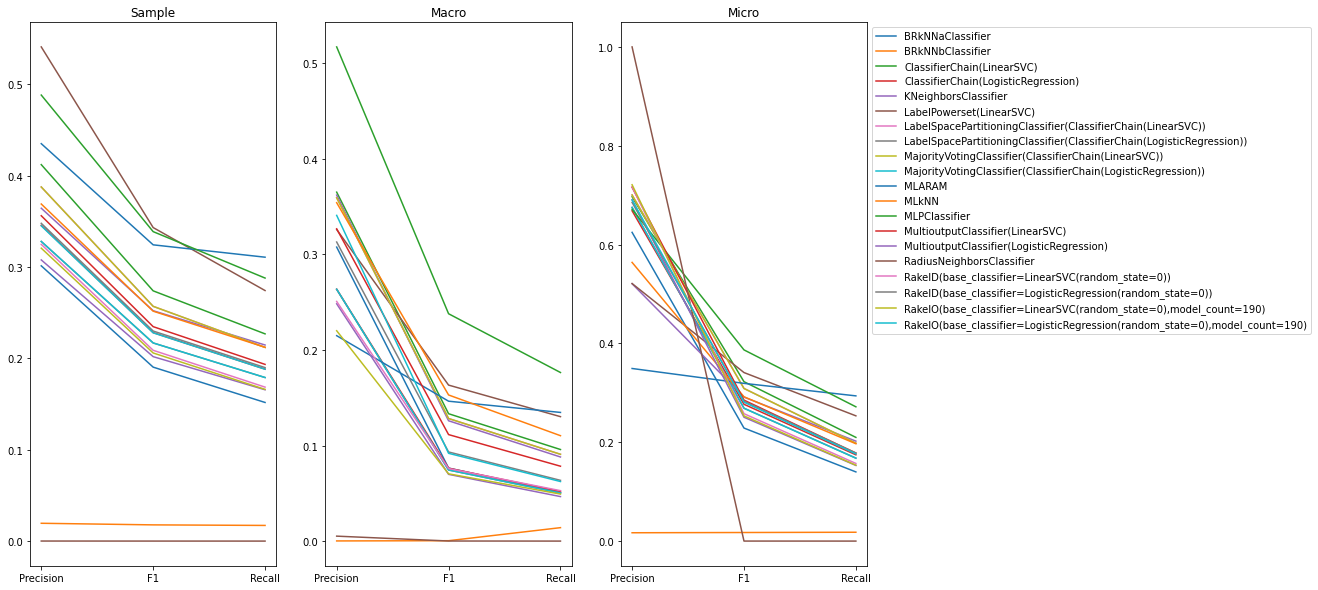

In [8]:
x_ = ['Precision', 'F1', 'Recall']
fig, axes = plt.subplots(1, 3, figsize=(15,10))
axes[0].set_title('Sample')
axes[1].set_title('Macro')
axes[2].set_title('Micro')
for eval_ in evals:
    evaluator = eval_[1]
    axes[0].plot(x_, [evaluator.precision_samples, evaluator.f1_samples, evaluator.recall_samples], label=eval_[0])
    axes[1].plot(x_, [evaluator.precision_macro, evaluator.f1_macro, evaluator.recall_macro], label=eval_[0])
    axes[2].plot(x_, [evaluator.precision_micro, evaluator.f1_micro, evaluator.recall_micro], label=eval_[0])
axes[2].legend(bbox_to_anchor=(1, 1), ncol=1)
plt.show()

In [9]:
top_3 = sorted(paths, key=lambda x: load(x).evaluation.sum(), reverse=True)[:3]

In [12]:
def per_label_accuracy(orig, prediction):
    if not isinstance(prediction, np.ndarray):
        prediction = prediction.toarray() 
    l = 1 - orig - prediction
    return np.average(l, axis=0)

In [28]:
from sklearn.metrics import classification_report
classwise_results = []
for clf_path in top_3:
    clf = load(clf_path)
    prediction = clf.predict(X_test)
    label_accuracies = per_label_accuracy(y_test, prediction)
    report = classification_report(y_test, prediction, output_dict=True, zero_division=0)
    classwise_report = {}
    for i, result in enumerate(report):
        if i < len(label_accuracies):
            classwise_report[result] = report[result]
            classwise_report[result]['accuracy'] = label_accuracies[int(result)]
    classwise_results.append((clf, classwise_report))

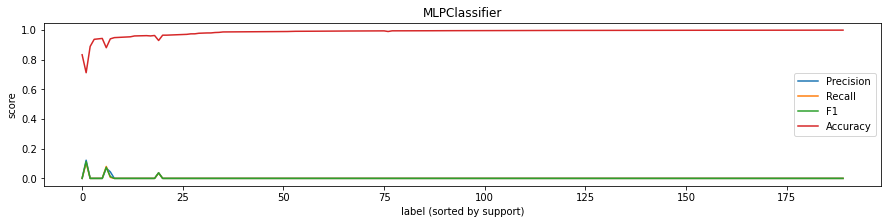

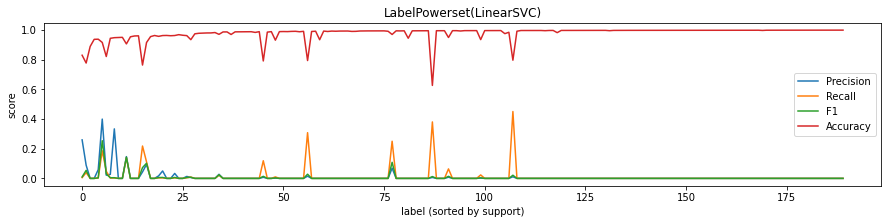

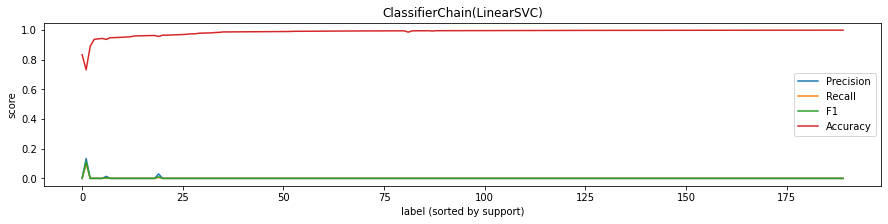

In [30]:
import numpy as np
x_ = np.arange(0, len(y_test[0]))
for classwise_result in classwise_results:
    name, results = classwise_result
    _, fig_1 = plt.subplots(figsize=(15,3))
    fig_1.set_title(name)
    sorted_results = sorted(results, key=lambda x: results[x]['support'], reverse=True)
    fig_1.plot(x_, [results[result]['precision'] for result in sorted_results], label='Precision')
    fig_1.plot(x_, [results[result]['recall'] for result in sorted_results], label='Recall')
    fig_1.plot(x_, [results[result]['f1-score'] for result in sorted_results], label='F1')
    fig_1.plot(x_, [results[result]['accuracy'] for result in sorted_results], label="Accuracy")
    fig_1.set_xlabel('label (sorted by support)')
    fig_1.set_ylabel('score')
    fig_1.legend(loc='best')
plt.show()